# Enaxis Data Science Regression Algorithms Starter-Kit with Python

Are you ready to get some machine learning experience under your belt?

We are in 2017 and every Fortune 500 company is talking about leveraging machine learning algorithms to future proof and automate their business.  Leading scientists are predicting Moore's Law for technology is becoming impossible and the shift will focus on making computers more accessible to our species. We see the [effects of machine learning](https://www.forbes.com/sites/bernardmarr/2016/09/30/what-are-the-top-10-use-cases-for-machine-learning-and-ai/#63c6398e94c9) escalating to make everyday life more personalized to everyone.  Online shopping recommendation, auto-enhancing selfies, self-driving cars, or even unlocking our phones are driven by machine learning technology.

Like most people, everyone is pondering on how machine learning operates in the background? Well machine learning algorithms are divided based on the data available.  

![alt text](https://raw.githubusercontent.com/EnxaisRichard/regressionstarterkit/master/ds.png "ML Categories")


In this blog, we will focus on trying out building a regression model (What numeric value are you trying to predict or forecast?) in Python on a public dataset.  If you are new to programming or even Data Science, this would be a perfect starting point to get hands on experience.  As Benjamin Franklin always said during his time, “Tell me I forget. Teach me I remember. Involve me I learn.”  In efforts to keep this tutotial less intimidating to follow, I wll lightly touch on your typical Data Science procedures, but leave a recommended link for those who seek a more in-depth guide. Afterall, we live in the age where “Googling” is the norm for learning a new subject as soon as possible.

<a id='toc'></a>
## Table of Content
These are hyperlinks so you can jump to different parts of this tutorial.

## [I. Data Science Enviroment Setup](#setup)
## [II. Data Ingestion](#ingestion)
## [III. Data Pre-Processing](#preprocessing)
## [IV. Regression Modeling](#regression)

For those interested in copying+pasting the whole code at once, you can find the github repo [here](https://github.com/EnxaisRichard/regressionstarterkit/blob/master/HandsON_Regressions.py)

<a id='setup'></a>
### I. Data Science Enviroment Setup

Step 1. [Download Anaconda based on your system specification](https://www.anaconda.com/download/).

Step 2. Open Command Prompt from your start menu.

Step 3. Type "jupyter notebook".

Step 4. Create a folder for all your Data Science Experiments.

Step 5. Create a new python 3 file and follow the tutorial below.

> For a more in depth guide, please click [here](https://medium.com/k-folds/setting-up-a-data-science-environment-5e6fd1cbd572).

![alt text](http://jupyter-notebook.readthedocs.io/en/latest/_images/dashboard-sort.png "Jupyter Preview")

<a id='ingestion'></a>
### Data Ingestion
[Back to Table of Content](#toc)

#### Importing your python Data Science Libraries.
For any libraries that do not work, go ahead and open command prompt/terminal again and type in "pip install #library name" to download/install python libraries automatically for quick usage.

In [1]:
# <-- By the way, hastags are used to write comments in Python.
#I will be commenting most of the code to give context to what is happening.

#dataframe library, we call it with variable "pd"
import pandas as pd

#matrix and math library, we call it with variable "np"
import numpy as np

#python system libraries to hide warning output for cleaner notebook
import warnings
warnings.filterwarnings('ignore')

#execute and view python code in any IPython IDE
%matplotlib inline

#print produces a written output after executing your code
print("Initial Python libraries are now ready for usage.")
print("-------------------------------------")

Initial Python libraries are now ready for usage.
-------------------------------------


#### Uploading or referencing a dataset
For other different methods of uploading a dataset examples, please click [here](https://chrisalbon.com/python/pandas_dataframe_importing_csv.html).

In [2]:
#Link from the UC Irvine public dataset on Forest Fires
url="http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
print("Pull dataset from {}".format(url))
print("-------------------------------------")

#assign a variable to the read URL dataset
dataframe = pd.read_csv(url)

#preview the first 5 rows/index of the dataset
print(dataframe.head(5))
print("-------------------------------------")


Pull dataset from http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv
-------------------------------------
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
-------------------------------------


#### Forest Fire Dataset
We will be experimenting with the Forest Fire Data. The target value we will be predicting will be "ISI - Initial Spread Index."  
UC Irvine has kindly provided the full variable descriptions below incase you wanted more details.

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - Fine Fuel Moisture Code Index from the FWI system: 18.7 to 96.20
   6. DMC - Duff Moisture Code Index from the FWI system: 1.1 to 291.3 
   7. DC - Drought Code Index from the FWI system: 7.9 to 860.6 
   8. ISI - Initial Spread Index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform)
    
For more details about the dataset, please refer to the [link](http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.names).


For more details about the Fire index, please refer to this [link](http://www.fbfrg.org/cffdrs/fire-weather-index-fwi-system).

<a id='preprocessing'></a>
### Data Pre-Processing
[Back to Table of Content](#toc)

Most dataset you work with requires a lot of data cleaning before modeling.  In this exercise, we asssume most of the data have already been sponged of blanks, bad information, or outliers.

For a further in-depth guide to data pre-processing, please refer [here](https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/)

In [3]:
#preview the data type for each columns
print("Data Types")
print(dataframe.dtypes)
print("-------------------------------------")

#code to summarize statistics of your current dataset BEFORE Label Encoding and Data Scaling
print("Data Statistical Summary")
print(dataframe.describe())
print("-------------------------------------")


#sklearn libraries are the Data Science Gold Standard library for Python
#pre-processing library is used for data preparation
from sklearn.preprocessing import LabelEncoder
#create encoding object to convert categorical value to numeric
encode = LabelEncoder()
#create additional 2 columns to convert category columns (Month & Days) into numeric values
dataframe['month_code'] = encode.fit_transform(dataframe['month'])
dataframe['day_code'] = encode.fit_transform(dataframe['day'])

print("Category columns have been encoded for machine learning")
print(dataframe.head(5))
print("-------------------------------------")


Data Types
X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object
-------------------------------------
Data Statistical Summary
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  

Our purpose for statisical summary is to examine our dataset for any unusual outliers or missing data that could throw off our model.

#### Data Visualization - Correlation Plot
There are many creative method to visually analyze your dataset in order to make hypothesis on your prediction. The most commonly used one for any regression algorithms are correlation plots.

For more details on other visual methods, please refer [here](http://pbpython.com/simple-graphing-pandas.html)

-------------------------------------


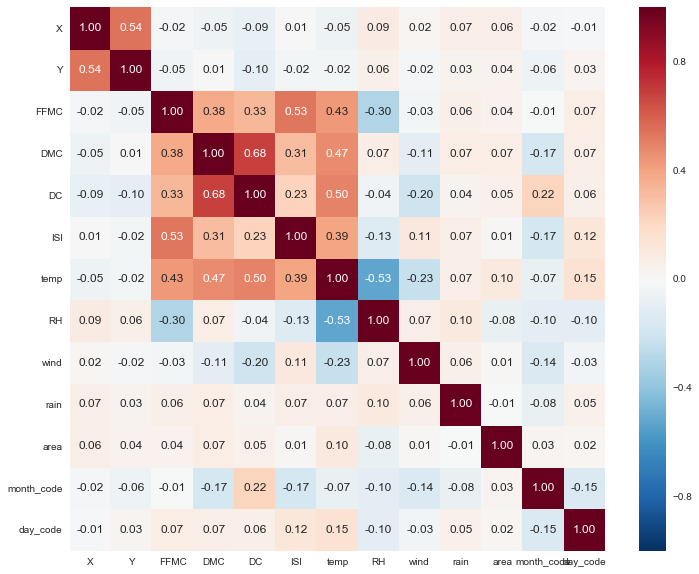

In [4]:
#python math plotting/chart library
import seaborn as sns
import matplotlib.pyplot as plt

#code to plot correlation strength amongst all varaibles/columns
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(dataframe.corr(), annot=True, fmt=".2f")

print("-------------------------------------")

We can see that ISI is mostly correlated with the variables: FFMC(.53), temp(.39), DMC(.31), AND DC(.23). It will be interesting to find how [feature importance](https://en.wikipedia.org/wiki/Feature_selection) result are effected from the correlation plot.  In other words, does having highly correlated variable make the determining factor for your machine learning algorithms?  We shall wait and see the results below. 

#### Data Scaling/Normalization
It is generally best practice to scale your training dataset from values 0-1. Doing so won't harm your correlation, but allows your models to run faster as well as be more effective with usage of "non-linear" regression models.

Fore more details about data scaling or normalization, please [refer here](https://en.wikipedia.org/wiki/Feature_scaling).

In [5]:
from sklearn.preprocessing import MinMaxScaler
#call scaler function(converting range of value in column from 0-1) from sklearn
scaler = MinMaxScaler()

#filter the dataframe with a variable: train:predictors & target:target

target_column = 'ISI'
#every column except target column
train = dataframe.loc[:, dataframe.columns != target_column]
target = dataframe[target_column]

print("The predicting variables used are: {}".format(list(train)))
print("-------------------------------------")
print("The target variable we are predicting is: {}".format(target_column))
print("-------------------------------------")


#select only numeric columns for data scaling
train = train.select_dtypes(exclude=['object'])
#apply scaler function to the train or predictors dataset
scaled_train = scaler.fit_transform(train)
print("Training dataset have been scaled from 0 to 1.")

#code to summarize statistics of your current dataset AFTER Label Encoding
scaled_features_df = pd.DataFrame(scaled_train, index=train.index, columns=train.columns)
print(scaled_features_df.describe())
print("-------------------------------------")


The predicting variables used are: ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'temp', 'RH', 'wind', 'rain', 'area', 'month_code', 'day_code']
-------------------------------------
The target variable we are predicting is: ISI
-------------------------------------
Training dataset have been scaled from 0 to 1.
                X           Y        FFMC         DMC          DC        temp  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.458656    0.328544    0.928318    0.378264    0.633329    0.536629   
std      0.289222    0.175700    0.071227    0.220698    0.290918    0.186708   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.250000    0.285714    0.922581    0.232598    0.504046    0.427653   
50%      0.375000    0.285714    0.940645    0.369400    0.769673    0.549839   
75%      0.750000    0.428571    0.957419    0.486906    0.827958    0.662379   
max      1.000000    1.000000    1.0

#### Data Splitting

It is recommended in Data Science procedure to split your dataset by a large percent chunk for training and use the model created on training set to validate the test set for consistency.  In our example, we will split the training set by 80% and leave the remaining 20% as testing.

![alt text](https://www.intechopen.com/source/html/39037/media/image3.jpeg "Train and Test Datasets")

For more explanation, please refer to this link [here](https://info.salford-systems.com/blog/bid/337783/Why-Data-Scientists-Split-Data-into-Train-and-Test)

In [6]:
from sklearn.cross_validation import train_test_split
#split the dataset into a training set(80% of the data) and test set(20% of the data)
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size = 0.2)
print("Training dataset have been split and assign to new variables.")
print("@_train set are the 80% of the data.")
print(X_train.shape)
print("@_test set are the remaining 20% of the data.")
print(X_test.shape)
print("-------------------------------------")

Training dataset have been split and assign to new variables.
@_train set are the 80% of the data.
(413, 12)
@_test set are the remaining 20% of the data.
(104, 12)
-------------------------------------


C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<a id='regression'></a>
### Regression Modeling
[Back to Table of Content](#toc)

Lets get to the juicy part and actually apply some machine learning models to our ready splitted dataset.  Most of the algorithms have been packaged by [sklearn](http://scikit-learn.org/stable/) which makes the code application or usage of machine learning easier than you think.

For more details about regression analysis, please refer to the link [here](https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/)

#### Hyper-Parameter Tuning & Cross Validation

##### Hyper-Parameter Tuning
Most machine learning models have a fixed numbers of parameters that can be tuned for a given solution. Finding the optimal combination manually is challenge. Therefore, we automated the parameter search process by running all possible combinations for the best score in a given list(GridSearchCV). 

For a more in-depth guide for hyper-parameter tuning, please refer to the link [here](https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/)


In [7]:
#sklearn libraries for actually preforming machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

#python library tool to switch variables for independent loops
import itertools

#Gradient Boost Machine Parameters
gbm_params = {'n_estimators': [50, 100], 
              'max_depth': [1,5,7], 
              'min_samples_split': [2,3,4],
              'learning_rate':[0.01,0.1,0.5,1]}

#Adaboost Parameters
ada_params = {'n_estimators': [50, 100],             
              'base_estimator': [DecisionTreeRegressor(max_depth=1),
                                 DecisionTreeRegressor(max_depth=5), 
                                 DecisionTreeRegressor(max_depth=5)], 
              'learning_rate':[0.01,0.1,0.5,1], 
              'random_state':[88]}

#Random Forest Parameters
rf_params = {'n_estimators': [50, 100], 
              'max_depth': [1,5,7], 
              'min_samples_split': [2,3,4], 
             'random_state':[88]}

print("Regressions' parameters defined.")
print("-------------------------------------")

#Assign Regression object from Sklearn to a variable
gbm_estimator = GradientBoostingRegressor(**gbm_params)
ada_estimator = AdaBoostRegressor(**ada_params)
rf_estimator = RandomForestRegressor(**rf_params)
print("Regression objects assigned to variables.")
print("-------------------------------------")

#Create a cycle for different regression variables to be used in a set loop we will create
reg_names_cycle = ["Gradient Boost Machine Regression", "AdaBoost Regession", "Random Forest Regression"]
reg_params_cycle = [gbm_params, ada_params, rf_params]
reg_estimator_cycle = [gbm_estimator, ada_estimator, rf_estimator]
print("variable cycles aligned and set.")
print("-------------------------------------")



Regressions' parameters defined.
-------------------------------------
Regression objects assigned to variables.
-------------------------------------
variable cycles aligned and set.
-------------------------------------


##### Cross-Validation
[Back to Table of Content](#toc)
To test your model consistent, typically you have to divide your data out K number of times as well as run the model K number of times with different subsets of training and validation datasets each round.

![alt text](https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg "4KFolds Cross-Validation")


For a more in-depth guide for cross-validation, please refer to the link [here](https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/)

In [8]:
#sklearn libraries for paramter tuning
from sklearn.model_selection import GridSearchCV

#number of regression used
number_of_regressions = 3

#Set a loop to go through each regression
for x in range(number_of_regressions):
    #create variables for each cycle iterations
    current_regression = reg_estimator_cycle[x]
    current_parameters = reg_params_cycle[x]
    current_reg_name = reg_names_cycle[x]
    print("x is {}.".format(x))
    print("Current_reg_name is {}.".format(current_reg_name))
    print("Current_regression is {}.".format(current_regression))
    print("Current_parameters is {}.".format(current_parameters))
    
    #run through all different parameters setting to find the best score
    current_regression = GridSearchCV(current_regression, current_parameters, verbose=1, cv=4).fit(X_train, y_train)
    
    #provide feature importance for each regression model
    importances = pd.DataFrame({'feature':scaled_features_df.columns,'importance':np.round(current_regression.best_estimator_.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')
    print(importances)
    print()
    
    #print out best mean cross validation scores
    current_best_cv_score =  current_regression.best_score_
    print("The optimal 4 KFolds Cross Validation Mean score on our training data with a {} is {}".format(current_reg_name, current_best_cv_score))
    print("Using the recommended parameters:")
    print(current_regression.best_params_)
    print()
    
    #run best parameters on training and test data, then assign variables
    current_r2_train_score =current_regression.score(X_train,y_train)
    current_r2_test_score = current_regression.score(X_test,y_test)
    print("The {} provides a Train Data score of: {}".format(current_reg_name, current_r2_train_score))
    print("The {} provides a Test Data score of: {}".format(current_reg_name, current_r2_test_score))
    print("-------------------------------------")
    
    
    #save back to reg_estimator_cycle for scoring later
    reg_estimator_cycle[x] = current_regression
    print("Saved current_regression optimal parameters back to reg_names_cycle variable")
    print("-------------------------------------")

x is 0.
Current_reg_name is Gradient Boost Machine Regression.
Current_regression is GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=[0.01, 0.1, 0.5, 1], loss='ls',
             max_depth=[1, 5, 7], max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=[2, 3, 4], min_weight_fraction_leaf=0.0,
             n_estimators=[50, 100], presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False).
Current_parameters is {'n_estimators': [50, 100], 'max_depth': [1, 5, 7], 'min_samples_split': [2, 3, 4], 'learning_rate': [0.01, 0.1, 0.5, 1]}.
Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:   10.7s finished


            importance
feature               
FFMC             0.161
DC               0.151
DMC              0.141
temp             0.133
RH               0.102
area             0.076
wind             0.064
X                0.061
day_code         0.052
Y                0.038
month_code       0.020
rain             0.002

The optimal 4 KFolds Cross Validation Mean score on our training data with a Gradient Boost Machine Regression is 0.6749000419794635
Using the recommended parameters:
{'learning_rate': 0.5, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}

The Gradient Boost Machine Regression provides a Train Data score of: 0.9999506220471016
The Gradient Boost Machine Regression provides a Test Data score of: 0.7265018157728313
-------------------------------------
Saved current_regression optimal parameters back to reg_names_cycle variable
-------------------------------------
x is 1.
Current_reg_name is AdaBoost Regession.
Current_regression is AdaBoostRegressor(base_est

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   10.6s finished


            importance
feature               
FFMC             0.435
DC               0.282
DMC              0.063
RH               0.054
month_code       0.040
Y                0.034
wind             0.032
temp             0.022
X                0.018
day_code         0.012
area             0.008
rain             0.000

The optimal 4 KFolds Cross Validation Mean score on our training data with a AdaBoost Regession is 0.6887069138844241
Using the recommended parameters:
{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'), 'learning_rate': 0.5, 'n_estimators': 100, 'random_state': 88}

The AdaBoost Regession provides a Train Data score of: 0.9330228026204299
The AdaBoost Regession provides a Test Data score of: 0.7005200102234537
----------

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   10.4s finished


#### Evaluation Metric
[Back to Table of Content](#toc)

In this example we will be using the coefficent of determinination to score our model performance. It rates the model from 0-100 percent, making it very easy to interpret.

For more evaluation metric for modeling performance, please check out the link [here](https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/).

In [60]:
#create list of empty arrays for predictions
length_predictions = len(X_test)
gbm_predictions = []
ada_predictions = []
rf_predictions = []

reg_predictions_cycle = [gbm_predictions, ada_predictions, rf_predictions]

for x in range(number_of_regressions):   
    #create variables for each cycle iterations
    current_regression = reg_estimator_cycle[x]
    current_reg_name = reg_names_cycle[x]
    
    #run best parameters on training and test data, then assign variables
    current_r2_train_score =current_regression.score(X_train,y_train)
    current_r2_test_score = current_regression.score(X_test,y_test)
    print("The {} provides a Train Data score of: {}".format(current_reg_name, current_r2_train_score))
    print("The {} provides a Test Data score of: {}".format(current_reg_name, current_r2_test_score))
    
    #assign best parameter predictions
    reg_predictions_cycle[x] = current_regression.predict(X_test)
    print("The {} have been assigned to prediction variable".format(current_reg_name))
    print(current_regression.predict(X_test))
    print("-------------------------------------")
    
    

The Gradient Boost Machine Regression provides a Train Data score of: 0.9999506220471016
The Gradient Boost Machine Regression provides a Test Data score of: 0.7265018157728313
The Gradient Boost Machine Regression have been assigned to prediction variable
[  6.70853308   7.24887576   6.5756243   13.91724816   3.99896182
   6.92881325   9.72095509  19.33926039  11.02306355   6.98405904
  11.07842587   9.67136929  17.54340686   4.33838993  12.1383628
   9.6531968    9.75759846  18.16445919   6.60303639  13.23534523
   8.09471433  12.16386103  11.02306355   6.23194315   8.50605908
  10.45321102   9.33587611   8.50650065   5.87408291  13.50794509
  11.16042824   2.5937243    6.58303292   7.30380416   6.14461512
   5.25420874   6.65834904   2.81045367  10.98203588  12.8736349
  10.58054294  15.60628535   6.25260101   7.8570526    6.51726161
   9.62827237   9.42960489  17.1190478   13.71249215   8.00093116
   9.36215856  17.99551679   5.2200592   14.08331004   7.24145832
   9.54581975   7.6

In [12]:
#we create function to plot actual vs predicted target values
def actual_vs_predicted(predicted_values, regression_names, test_score, train_score, color):   
    plt.figure(figsize=(15,7.5))
    plt.scatter(y_test, predicted_values, color=color, label=regression_names, s=10)
    test_score = np.round(test_score,3)
    train_score = np.round(train_score,3)
    plt.title("{} - Actual vs Predicted with Test r2  Score: {} & Train r2 Score: {}.".format(regression_names, test_score, train_score))
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
    plt.legend()
    plt.show()
    
print("function for graph completed")
print("-------------------------------------")

function for graph completed
-------------------------------------


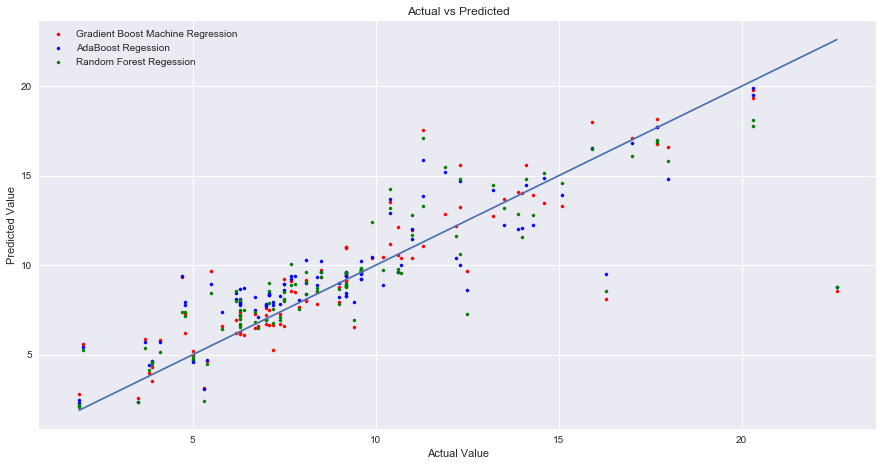

-------------------------------------


In [69]:
#place all variables created through function for plotting actual vs predicted values
plt.figure(figsize=(15,7.5))
plt.scatter(y_test, reg_predictions_cycle[0], color="r", label="Gradient Boost Machine Regression", s=10)
plt.scatter(y_test, reg_predictions_cycle[1], color="b", label="AdaBoost Regession", s=10)
plt.scatter(y_test, reg_predictions_cycle[2], color="g", label="Random Forest Regession", s=10)
plt.title("Actual vs Predicted")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.legend()
plt.show()
print("-------------------------------------")